In [2]:
!pip install pandas torch numpy seaborn scikit-learn

#  Step 1 - Libraries

In [3]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns
from torch import nn, optim
import torch.nn.functional as F
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 2 - Database

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
df = pd.read_csv('Datasets/autos.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
df.shape

(371528, 20)

In [8]:
df = df.drop(columns=['dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis=1)

In [9]:
df.shape

(371528, 15)

In [10]:
df['name'].value_counts().reset_index()

,name,count
0,Ford_Fiesta,657
1,BMW_318i,627
2,Opel_Corsa,622
3,Volkswagen_Golf_1.4,603
4,BMW_316i,523
...,...,...
233526,Suche_Opel_corsa_a_zu_verschenken,1
233527,E_500_Avantgarde_AMG_Ausstattung,1
233528,BMW_E60_530XD,1
233529,Mini_One_Pepper_Scheckheftgepflegt,1


In [11]:
df = df.drop('name', axis=1)

In [12]:
df['seller'].value_counts().reset_index()

,seller,count
0,privat,371525
1,gewerblich,3


In [13]:
df = df.drop('seller', axis=1)

In [14]:
df['offerType'].value_counts().reset_index()

,offerType,count
0,Angebot,371516
1,Gesuch,12


In [15]:
df.shape

(371528, 13)

In [16]:
il = df[df['price'] <= 10]
il

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
7,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
40,Angebot,0,test,NaN,1990,NaN,0,corsa,150000,1,benzin,opel,NaN
60,Angebot,1,control,suv,1994,manuell,286,NaN,150000,11,NaN,sonstige_autos,NaN
91,Angebot,1,control,limousine,1995,manuell,113,e_klasse,150000,4,diesel,mercedes_benz,nein
115,Angebot,0,test,NaN,2017,manuell,0,golf,5000,12,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,Angebot,0,control,NaN,2000,manuell,65,corsa,150000,0,NaN,opel,ja
371392,Angebot,0,test,kleinwagen,2002,manuell,60,fiesta,150000,3,benzin,ford,NaN
371402,Angebot,0,control,kleinwagen,1999,manuell,53,swift,150000,3,benzin,suzuki,NaN
371431,Angebot,0,control,kleinwagen,1999,manuell,37,arosa,150000,7,benzin,seat,ja


In [17]:
df = df[df['price'] > 10]

In [18]:
df

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [19]:
il2 = df[df['price'] > 350000]
il2

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1846,Angebot,579000,control,coupe,1980,manuell,277,andere,20000,12,benzin,bmw,nein
10649,Angebot,420000,control,coupe,2004,manuell,483,911,50000,4,benzin,porsche,nein
14663,Angebot,11111111,control,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,NaN
16889,Angebot,1000000,control,kombi,1998,NaN,0,mondeo,150000,0,benzin,ford,ja
20143,Angebot,1250000,test,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364171,Angebot,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein
365461,Angebot,599000,control,coupe,1980,manuell,377,andere,5000,3,benzin,bmw,nein
366653,Angebot,99999999,control,cabrio,1996,manuell,192,3er,150000,0,NaN,bmw,NaN
366861,Angebot,3895000,test,coupe,2006,NaN,799,NaN,5000,4,benzin,sonstige_autos,nein


In [20]:
df = df[df['price'] < 350000]

In [21]:
df.shape

(359291, 13)

<Axes: >

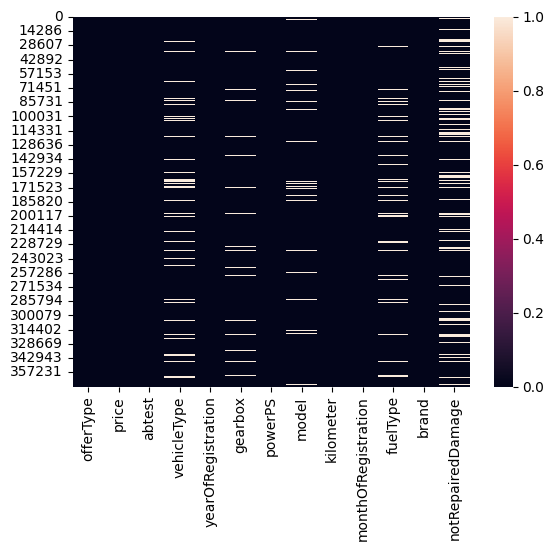

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.loc[pd.isnull(df['vehicleType'])]

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,Angebot,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,Angebot,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,Angebot,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,Angebot,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371495,Angebot,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,Angebot,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,Angebot,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,Angebot,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [24]:
df['vehicleType'].value_counts().reset_index()

,vehicleType,count
0,limousine,93614
1,kleinwagen,78014
2,kombi,65921
3,bus,29699
4,cabrio,22509
5,coupe,18386
6,suv,14477
7,andere,3125


In [25]:
df.loc[pd.isnull(df['gearbox'])]

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,Angebot,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,Angebot,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,Angebot,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,Angebot,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,Angebot,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371443,Angebot,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,Angebot,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,Angebot,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,Angebot,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [26]:
df['gearbox'].value_counts().reset_index()

,gearbox,count
0,manuell,266547
1,automatik,75508


In [27]:
df[pd.isnull(df['model'])]

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,Angebot,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,Angebot,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,Angebot,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,Angebot,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371399,Angebot,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,Angebot,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,Angebot,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,Angebot,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [28]:
df['model'].value_counts().reset_index()

,model,count
0,golf,28989
1,andere,25560
2,3er,19905
3,polo,12604
4,corsa,12149
...,...,...
246,serie_2,8
247,rangerover,6
248,serie_3,3
249,serie_1,1


In [29]:
df.loc[pd.isnull(df['fuelType'])]

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,Angebot,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,Angebot,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,Angebot,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,Angebot,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371496,Angebot,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,Angebot,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,Angebot,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,Angebot,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [30]:
df['fuelType'].value_counts().reset_index()

,fuelType,count
0,benzin,217582
1,diesel,106002
2,lpg,5222
3,cng,557
4,hybrid,271
5,andere,165
6,elektro,101


In [31]:
df.loc[pd.isnull(df['notRepairedDamage'])]

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,Angebot,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371507,Angebot,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,Angebot,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,Angebot,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [32]:
df['notRepairedDamage'].value_counts().reset_index()

,notRepairedDamage,count
0,nein,259301
1,ja,34004


In [33]:
values = {
    'vehicleType': 'limousine',
    'gearbox': 'manuell',
    'model': 'golf',
    'fuelType': 'benzin',
    'notRepairedDamage': 'nein'
}

df = df.fillna(value=values)

<Axes: >

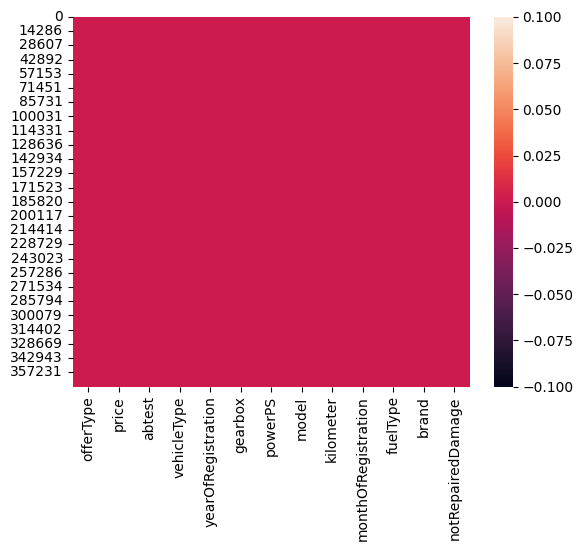

In [34]:
sns.heatmap(df.isnull())

In [35]:
forecasters = df.drop('price', axis=1)
price = df['price']

In [36]:
forecasters = forecasters.drop(forecasters.columns[0], axis=1)


In [37]:
forecasters.shape

(359291, 11)

In [38]:
forecasters

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein
371524,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein


In [39]:
price

0           480
1         18300
2          9800
3          1500
4          3600
          ...  
371523     2200
371524     1199
371525     9200
371526     3400
371527    28990
Name: price, Length: 359291, dtype: int64

In [40]:
one_hot_encoder = ColumnTransformer(transformers = [("OneHot", OneHotEncoder(),
                                                   [0,1,3,5,8,9,10])], 
                                  remainder = 'passthrough')

In [41]:
forecasters = one_hot_encoder.fit_transform(forecasters).toarray()

In [42]:
forecasters

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 1.50e+05, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.90e+02, 1.25e+05, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.63e+02, 1.25e+05, 8.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.02e+02, 1.50e+05, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.00e+02, 1.50e+05, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 3.20e+02, 5.00e+04, 8.00e+00]])

In [43]:
forecasters.shape

(359291, 316)

In [44]:
forecasters = torch.tensor(forecasters, dtype=torch.float)
price_tensor = torch.tensor(price, dtype=torch.float).view(-1, 1)

## Step 3 - Model building

In [45]:
# 316 -> 158 -> 158 -> 1

regressor = nn.Sequential(
    nn.Linear(316, 158),
    nn.ReLU(),
    nn.Linear(158, 158),
    nn.ReLU(),
    nn.Linear(158, 1)
)

In [46]:
criterion = nn.L1Loss()

In [47]:
optimizer = optim.Adam(
    regressor.parameters(),
    lr = 0.001,
    weight_decay=0.0001
)

In [48]:
dataset = torch.utils.data.TensorDataset(
    forecasters, price_tensor
)

In [49]:
train_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 300,
    shuffle = True
)

## Step 4 - Model train

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [51]:
regressor.to(device)

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [52]:
for epoch in range(100):
    running_loss = 0.
    running_mae = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = regressor.forward(inputs)

        mae = F.l1_loss(outputs, labels).item()

        running_mae += mae

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1} loss: {running_loss/len(train_loader)} mae: {running_mae/len(train_loader)}')

Epoch 1 loss: 3686.228869404737 mae: 3686.228869404737
Epoch 2 loss: 2989.2986532730333 mae: 2989.2986532730333
Epoch 3 loss: 2842.1016214972547 mae: 2842.1016214972547
Epoch 4 loss: 2796.0054786949604 mae: 2796.0054786949604
Epoch 5 loss: 2737.975984551075 mae: 2737.975984551075
Epoch 6 loss: 2703.5621692485524 mae: 2703.5621692485524
Epoch 7 loss: 2676.4757175859504 mae: 2676.4757175859504
Epoch 8 loss: 2642.3416271177875 mae: 2642.3416271177875
Epoch 9 loss: 2597.7803107311015 mae: 2597.7803107311015
Epoch 10 loss: 2569.1195782643927 mae: 2569.1195782643927
Epoch 11 loss: 2547.8921022749505 mae: 2547.8921022749505
Epoch 12 loss: 2515.819273781498 mae: 2515.819273781498
Epoch 13 loss: 2501.707740847376 mae: 2501.707740847376
Epoch 14 loss: 2477.427735292056 mae: 2477.427735292056
Epoch 15 loss: 2476.6171071047775 mae: 2476.6171071047775
Epoch 16 loss: 2448.911460507095 mae: 2448.911460507095
Epoch 17 loss: 2431.773493644192 mae: 2431.773493644192
Epoch 18 loss: 2451.564224574323 mae:

## Step 5 - Model evaluation

In [53]:
regressor.eval()

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [ ]:
forecasters = regressor.forward(forecasters.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (359291x1 and 316x158)

In [56]:
forecasters

tensor([[  679.9610],
        [ 8633.7100],
        [10797.4824],
        ...,
        [ 5117.7129],
        [ 2590.7314],
        [25996.0645]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
# forecasters < 0

forecasters[forecasters < 0] = 0

In [57]:
price_tensor

tensor([[  480.],
        [18300.],
        [ 9800.],
        ...,
        [ 9200.],
        [ 3400.],
        [28990.]])

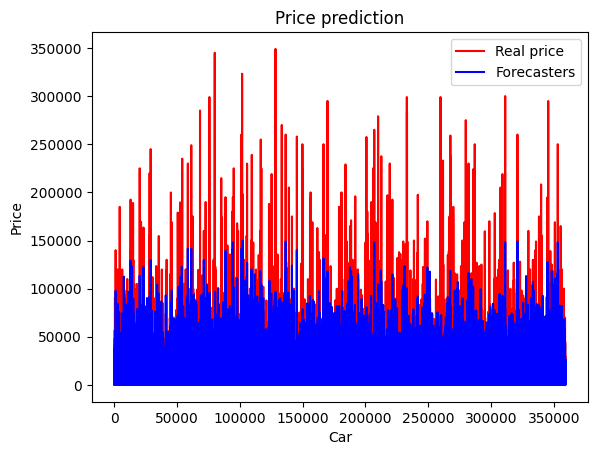

In [60]:
# plot to compare the forecasters with the real price

import matplotlib.pyplot as plt

plt.plot(price_tensor, color='red', label='Real price')
plt.plot(forecasters.detach().cpu().numpy(), color='blue', label='Forecasters')
plt.title('Price prediction')
plt.xlabel('Car')
plt.ylabel('Price')
plt.legend()
plt.show()
